Miembros del grupo:
Ziteng Huang y Lubin Ye

# Práctica 4: Procesamiento del Lenguaje Natural

__Fecha de entrega: 14 de mayo de 2024__

El objetivo de esta práctica es aplicar los conceptos teóricos vistos en clase en el módulo de PLN.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

In [ ]:
# acceso a google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
RANDOM_STATE = 1234

In [ ]:
import nltk
import re
import numpy as np
import csv
import pandas as pd

from sklearn.model_selection import train_test_split
from collections import Counter

# 1) Carga del conjunto de datos

El fichero `spam.csv` contiene mensajes SMS etiquetados como spam or ham (legítimo).

Muestra un ejemplo de cada clase.

Haz un estudio del conjunto de datos. ¿qué palabras aparecen más veces?, ¿tendría sentido normalizar de alguna manera el corpus?

Crea una partición de los datos dejando el 60% para entrenamiento, 20% para validación y el 20% restante para test. Comprueba que la distribución de los ejemplos en las particiones es similar.

In [ ]:
# Cargar dataset -> encoding="latin1"

def load_data():
    corpus = []
    labels = []
    with open('/content/drive/MyDrive/Colab/P4/spam.csv', 'r', encoding="latin1") as f:
        reader = csv.reader(f)
        reader.__next__()
        for row in reader:
            corpus.append(row[1])
            labels.append(row[0])

    corpus_df = pd.DataFrame({'Document': corpus,
                        'Category': labels})

    return corpus, labels, corpus_df


corpus, labels, corpus_df = load_data()

corpus_df


,Document,Category
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,spam
5568,Will Ì_ b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other s...",ham
5570,The guy did some bitching but I acted like i'd...,ham


In [ ]:
# Contar palabras más frecuentes -> palabras sin significado

def contar_palabras(corpus):
    lista_palabras = []
    for text in corpus:
        lista_palabras.extend(text.split(" "))

    counter = Counter(lista_palabras)
    palabras_mas_comunes = counter.most_common()

    # Palabras más comunes
    print("Palabras más comunes:")
    for palabra, frecuencia in palabras_mas_comunes:
        print(f"{palabra}: {frecuencia}")

contar_palabras(corpus)

Streaming output truncated to the last 5000 lines.
ThatÛ÷s: 1
apes,: 1
go,: 1
notice.: 1
fujitsu,: 1
ibm,: 1
hp,: 1
toshiba...: 1
Gosh: 1
Spose: 1
rimac: 1
arestaurant: 1
squid!: 1
10:30: 1
dosomething: 1
late?\"": 1
\HELLO: 1
U.CALL: 1
WRK.I: 1
FANCY: 1
MEETIN: 1
WIV: 1
TONITE: 1
BREAK: 1
DABOOKS.: 1
HRS: 1
NITE+2: 1
WRK!\"": 1
&SAM: 1
EACHOTHER.: 1
HOUSE: 1
Luckily: 1
starring: 1
madam: 1
restocked: 1
www.tkls.com: 1
stoptxtstopå£1.50/week: 1
innocent: 1
mental: 1
question..: 1
smoothly.: 1
challenging: 1
hon: 1
pple...$700: 1
$900: 1
nights...Excellent: 1
breakfast: 1
hamper!!!: 1
cc100p/min: 1
reality: 1
website?: 1
da..al: 1
above: 1
\POLYS\": 1
87131.: 1
tone.: 1
0870737910216yrs: 1
å£1.50/wk.": 1
Unni: 1
recharge..Rakhesh: 1
lacking: 1
particular: 1
dramastorm's: 1
what...: 1
forfeit...: 1
treated: 1
digi: 1
cam,: 1
coupla: 1
wks!: 1
077xxx: 1
09066362206: 1
CAL: 1
SIR.: 1
sundayish,: 1
held: 1
prasad.: 1
Tiwary: 1
rcb.battle: 1
bang: 1
kochi.: 1
Moms: 1
checkup: 1
aka: 1
smear

In [ ]:
wpt = nltk.WordPunctTokenizer()
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Borrar palabras sin signifcado (stop words)

norm_corpus = normalize_corpus(corpus)
norm_corpus

array(['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
       'ok lar joking wif u oni',
       'free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply overs',
       ..., 'pity mood soany suggestions',
       'guy bitching acted like id interested buying something else next week gave us free',
       'rofl true name'], dtype='<U516')

In [ ]:
# Volvemos a contar ahora las palabras más comunes después de normalizar

contar_palabras(norm_corpus)

Streaming output truncated to the last 5000 lines.
bluff: 2
sary: 2
wwwfullonsmscom: 2
gn: 2
piece: 2
wiskey: 2
brandy: 2
rum: 2
gin: 2
scotch: 2
shampain: 2
kudiyarasu: 2
dhina: 2
vaazhthukkal: 2
kg: 2
dumb: 2
dressed: 2
kills: 2
kay: 2
nasty: 2
wasted: 2
christ: 2
science: 2
push: 2
answered: 2
wrote: 2
swiss: 2
crore: 2
jobs: 2
lane: 2
politicians: 2
rights: 2
donno: 2
properly: 2
pongaldo: 2
sry: 2
furniture: 2
lock: 2
shoving: 2
papers: 2
strange: 2
aclpm: 2
indyarockscom: 2
resume: 2
datoday: 2
bids: 2
yunny: 2
mmmmm: 2
relatives: 2
benefits: 2
goodenvironment: 2
terrific: 2
ph: 2
dr: 2
superior: 2
picsfree: 2
ruin: 2
department: 2
conform: 2
bc: 2
toshiba: 2
wrk: 2
madam: 2
knock: 2
innocent: 2
mental: 2
hoped: 2
bills: 2
marrow: 2
hon: 2
treated: 2
fab: 2
tiwary: 2
bang: 2
pap: 2
arts: 2
secretary: 2
dollar: 2
pull: 2
amongst: 2
lp: 2
northampton: 2
abj: 2
serving: 2
anna: 2
nagar: 2
petrol: 2
evr: 2
neither: 2
hugs: 2
snogs: 2
west: 2
fastest: 2
growing: 2
chase: 2
steam: 2
re

In [ ]:
# Split data en training, validacion y test

def split_data(corpus, labels):

    corpus_train, corpus_val_test, labels_train, labels_val_test = train_test_split(corpus, labels, test_size=0.4, random_state=RANDOM_STATE)
    corpus_val, corpus_test, labels_val, labels_test = train_test_split(corpus_val_test, labels_val_test, test_size=0.5, random_state=RANDOM_STATE)

    corpus_df_train = pd.DataFrame({'Document': corpus_train,
                           'Category': labels_train})

    corpus_df_val = pd.DataFrame({'Document': corpus_val,
                                    'Category': labels_val})

    corpus_df_test = pd.DataFrame({'Document': corpus_test,
                                    'Category': labels_test})

    return corpus_df_train, corpus_df_val, corpus_df_test


corpus_df_train, corpus_df_val, corpus_df_test = split_data(norm_corpus, labels)
corpus_df_train

,Document,Category
0,bring home wendy,ham
1,checked heading drop stuff,ham
2,ltdecimalgt common car better buy china asia f...,ham
3,alreadysabarish asked go,ham
4,sarcasm nt scarcasim,ham
...,...,...
3338,yes baby study positions kama sutra,ham
3339,great day beautiful one,ham
3340,ok,ham
3341,ya even cookies jelly,ham


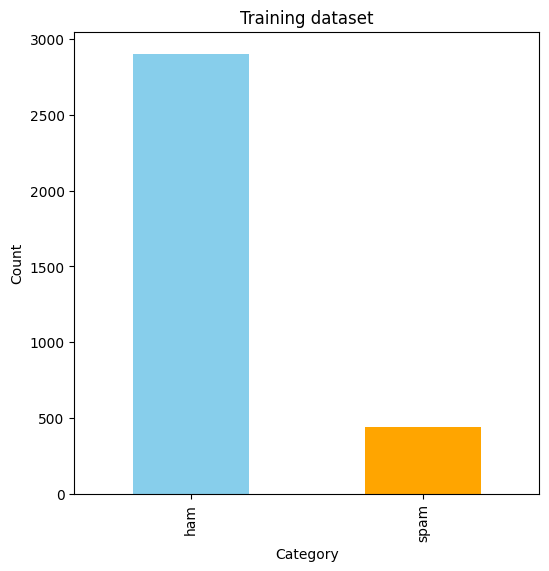

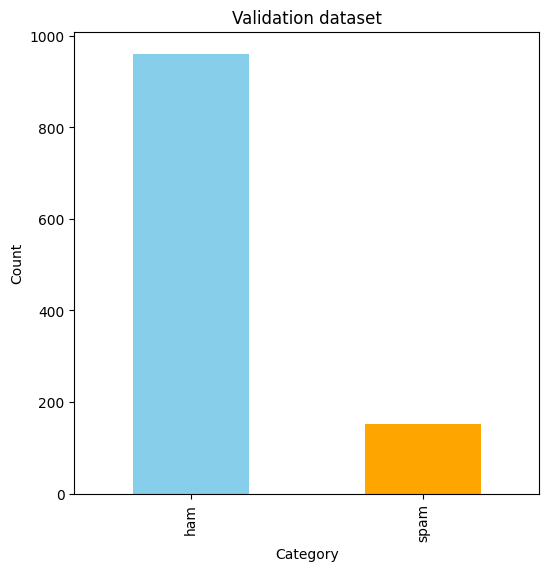

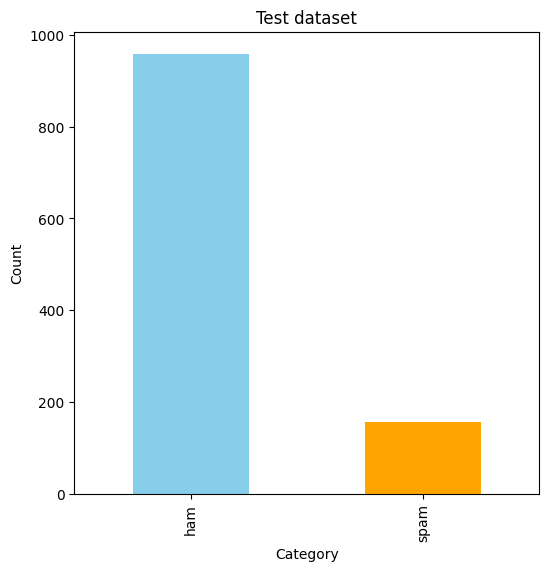

In [ ]:
import matplotlib.pyplot as plt

def plot_class_distribution(corpus_df, title):
    plt.figure(figsize=(6,6))
    corpus_df['Category'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
    plt.title(title)
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.show()

plot_class_distribution(corpus_df_train, "Training dataset")
plot_class_distribution(corpus_df_val, "Validation dataset")
plot_class_distribution(corpus_df_test, "Test dataset")


RESPUESTA:

Se observa que las palabras más frecuentes son "to", "you" e "I". Sin embargo, dado que estas palabras son bastante genéricas y no contribuyen significativamente a la clasificación de mensajes como spam o no spam, normalizar el corpus podría mejorar la capacidad del modelo para identificar palabras clave y patrones relevantes, ya que así eliminamos ruido y palabras genéricas.

Después de la normalización, las palabras más destacadas son "u", "call" e "im". Esto sugiere que estas palabras podrían ser más relevantes para la clasificación de mensajes. Por ejemplo, "u" es una abreviatura común de "you", "call" puede estar asociada con llamadas telefónicas y "im" podría ser una contracción de "I'm" (estoy) utilizada en mensajes informales.

Comprobamos que la distribución de los datasets es proporcional la disribución de las clases proporcionada en el .csv

# 2) Representación como bolsa de palabras

Elige justificadamente una representación de bolsa de palabras y aplícala.
Muestra un ejemplo antes y después de aplicar la representación. Explica los cambios.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def get_tfidf_features(corpus):
    tv = TfidfVectorizer()
    tv_matrix = tv.fit_transform(corpus)
    tv_matrix = tv_matrix.toarray()

    vocab = tv.get_feature_names_out()
    return pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

# Ejemplo de frecuencia de las palabras de los primeros 5 documentos
print(get_tfidf_features(norm_corpus[:5]))

# Ejemplo de frecuencia de todos los documentos
print(get_tfidf_features(norm_corpus))

   already  amore  apply  around  available  buffet  bugis  cine  comp  crazy  \
0     0.00   0.27    0.0    0.00       0.27    0.27   0.27  0.27   0.0   0.27   
1     0.00   0.00    0.0    0.00       0.00    0.00   0.00  0.00   0.0   0.00   
2     0.00   0.00    0.2    0.00       0.00    0.00   0.00  0.00   0.2   0.00   
3     0.35   0.00    0.0    0.00       0.00    0.00   0.00  0.00   0.0   0.00   
4     0.00   0.00    0.0    0.35       0.00    0.00   0.00  0.00   0.0   0.00   

   ...  think  though  tkts  txt   usf   wat   wif  win  wkly  world  
0  ...   0.00    0.00   0.0  0.0  0.00  0.27  0.00  0.0   0.0   0.27  
1  ...   0.00    0.00   0.0  0.0  0.00  0.00  0.45  0.0   0.0   0.00  
2  ...   0.00    0.00   0.2  0.2  0.00  0.00  0.00  0.2   0.2   0.00  
3  ...   0.00    0.00   0.0  0.0  0.00  0.00  0.00  0.0   0.0   0.00  
4  ...   0.35    0.35   0.0  0.0  0.35  0.00  0.00  0.0   0.0   0.00  

[5 rows x 50 columns]
       aa  aah  aaniye  aaooooright  aathilove  aathiwhere   ab 

RESPUESTA:

Hemos empleado la representación de word-bag utilizando el método del TFIDF. Inicialmente, lo aplicamos a los primeros cinco documentos del corpus para obtener las frecuencias de cada palabra en relación con esos cinco documentos. Esta aproximación nos permite examinar cómo se distribuyen las palabras clave en un conjunto más reducido de textos antes de generalizar a todo el corpus.

Luego, extrapolamos esta técnica al conjunto completo de documentos, incluyendo todas las palabras presentes en ellos. Esto nos proporciona una tabla exhaustiva que refleja las frecuencias de todas las palabras en cada documento. Sin embargo, debido a la inmensidad de la representación tabular, es posible que no todas las frecuencias sean visibles a simple vista. Aunque, idealmente, estas frecuencias deberían estar en el rango de 0 a 1, lo que nos permite tener una idea de la importancia relativa de cada palabra en cada documento.

Comparado con el método de búsqueda de palabras más frecuentes en todo el corpus, la representación TFIDF nos ofrece una perspectiva más detallada y precisa. Esta técnica nos permite examinar datos más relevantes y nos brinda una comprensión más clara de cómo se distribuyen las palabras clave a lo largo de los documentos.

# 3) Aplica 3 algoritmos de aprendizaje automático para resolver la tarea

Justifica porqué los has elegido.
Ajusta los modelos respecto a un hiperparámetro que consideres oportuno. Justifica tu elección.
Explica los resultados obtenidos.

In [ ]:
# Árbol de decisión

from sklearn import tree
import numpy as np

vectorizer = TfidfVectorizer()

train_preprocessed = vectorizer.fit_transform(corpus_df_train["Document"]).toarray()
test_preprocessed = vectorizer.transform(corpus_df_test["Document"]).toarray()

# Creamos el clasificador con los valores por defecto
tree_classifier = tree.DecisionTreeClassifier(criterion="entropy")

tree_classifier.fit(train_preprocessed, corpus_df_train["Category"])

tree_train_predictions = tree_classifier.predict(train_preprocessed)
tree_test_predictions = tree_classifier.predict(test_preprocessed)

print("Árbol, porcentaje de aciertos en entrenamiento:", np.mean(tree_train_predictions == corpus_df_train["Category"]))
print("Árbol, porcentaje de aciertos en test:", np.mean(tree_test_predictions == corpus_df_test["Category"]))

Árbol, porcentaje de aciertos en entrenamiento: 1.0
Árbol, porcentaje de aciertos en test: 0.9479820627802691


In [ ]:
# k-NN vecinos más cercanos

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors

# Lista para almacenar los resultados de validación cruzada
cv_scores = []

# Rango de valores de k para probar
k_range = range(1, 10)

k_opt = 0
max_score = 0

for k in k_range:
    knn_classifier = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(train_preprocessed, corpus_df_train["Category"])

    knn_train_predictions = knn_classifier.predict(train_preprocessed)
    knn_test_predictions = knn_classifier.predict(test_preprocessed)

    score = np.mean(knn_test_predictions == corpus_df_test["Category"])
    if score > max_score:
        k_opt = k
        max_score = score

    print(f"k-NN con k={k}, porcentaje de aciertos en entrenamiento:", np.mean(knn_train_predictions == corpus_df_train["Category"]))
    print(f"k-NN con k={k}, porcentaje de aciertos en test:", score)

knn_classifier = neighbors.KNeighborsClassifier(n_neighbors=k_opt)
knn_classifier.fit(train_preprocessed, corpus_df_train["Category"])
knn_test_predictions = knn_classifier.predict(test_preprocessed)
print(f"Mejor k: {k_opt}, porcentaje de aciertos: {max_score}")


# Para cada valor de k
for k in k_range:
    # Inicializar el clasificador k-NN
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Realizar validación cruzada con 5 divisiones
    scores = cross_val_score(knn_classifier, train_preprocessed, corpus_df_train["Category"], cv=5)

    # Calcular la media de los puntajes de validación cruzada
    mean_score = np.mean(scores)

    # Agregar la media de puntaje a la lista
    cv_scores.append(mean_score)

    print(f"k-NN con k={k}, puntaje de validación cruzada:", mean_score)


k-NN con k=1, porcentaje de aciertos en entrenamiento: 1.0
k-NN con k=1, porcentaje de aciertos en test: 0.9452914798206278
k-NN con k=2, porcentaje de aciertos en entrenamiento: 0.9407717618905175
k-NN con k=2, porcentaje de aciertos en test: 0.9174887892376682
k-NN con k=3, porcentaje de aciertos en entrenamiento: 0.9410708944062219
k-NN con k=3, porcentaje de aciertos en test: 0.9174887892376682
k-NN con k=4, porcentaje de aciertos en entrenamiento: 0.9210290158540233
k-NN con k=4, porcentaje de aciertos en test: 0.9040358744394619
k-NN con k=5, porcentaje de aciertos en entrenamiento: 0.9210290158540233
k-NN con k=5, porcentaje de aciertos en test: 0.9040358744394619
k-NN con k=6, porcentaje de aciertos en entrenamiento: 0.909661980257254
k-NN con k=6, porcentaje de aciertos en test: 0.8932735426008969
k-NN con k=7, porcentaje de aciertos en entrenamiento: 0.909661980257254
k-NN con k=7, porcentaje de aciertos en test: 0.8932735426008969
k-NN con k=8, porcentaje de aciertos en entr

In [ ]:
# Naive Bayes

from sklearn.naive_bayes import MultinomialNB

mnb_classifier = MultinomialNB()

# Sin hiperparámetro
mnb_classifier.fit(train_preprocessed, corpus_df_train["Category"])

mnb_train_predictions = mnb_classifier.predict(train_preprocessed)
mnb_test_predictions = mnb_classifier.predict(test_preprocessed)

print("Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(mnb_train_predictions == corpus_df_train["Category"]))
print("Multinomial Naive Bayes, porcentaje de aciertos en test:", np.mean(mnb_test_predictions == corpus_df_test["Category"]))


# Lista de valores alpha para probar
alpha_values = [0.1, 0.5, 1.0, 2.0]

best_alpha = None
best_accuracy = 0

# Iterar sobre los valores de alpha
for alpha in alpha_values:
    # Inicializar el clasificador con el valor de alpha actual
    mnb_classifier = MultinomialNB(alpha=alpha)

    # Entrenar el clasificador
    mnb_classifier.fit(train_preprocessed, corpus_df_train["Category"])

    # Realizar predicciones en el conjunto de prueba
    mnb_test_predictions = mnb_classifier.predict(test_preprocessed)

    # Calcular la precisión en el conjunto de prueba
    accuracy = np.mean(mnb_test_predictions == corpus_df_test["Category"])

    # Actualizar el mejor valor de alpha si encontramos una precisión mejor
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_alpha = alpha

print("Mejor valor de alpha:", best_alpha)
print("Precisión en el conjunto de prueba con el mejor valor de alpha:", best_accuracy)

Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento: 0.9754711337122345
Multinomial Naive Bayes, porcentaje de aciertos en test: 0.9533632286995516
Mejor valor de alpha: 0.1
Precisión en el conjunto de prueba con el mejor valor de alpha: 0.9766816143497757


RESPUESTA:

1. **Árbol de decisión:**
   - **Justificación:** Los árboles de decisión son algoritmos de aprendizaje supervisado versátiles que pueden manejar tanto características numéricas como categóricas. Son fáciles de interpretar y pueden manejar problemas de clasificación y regresión. Son adecuados para este problema ya que los textos pueden contener una variedad de características que pueden ser fácilmente utilizadas por un árbol de decisión para clasificarlos.
   - **Ajuste de hiperparámetro:** En este caso, stablecemos criterion='entropy' en el clasificador DecisionTreeClassifier. La entropía mide la ausencia de homogeneidad, la disminución de la entropía es la diferencia entre la entropía de todo el conjunto original y la de los subconjuntos obtenidos. El objetivo es minimizar este valor a medida que se van expandiendo los nodos del árbol. La terminación ocurre cuando todos sus ejemplos pertenecen a la misma clase o cuando no quedan más atributos para expandir nodos.

2. **k-NN (k Vecinos Más Cercanos):**
   - **Justificación:** k-NN es un algoritmo simple y efectivo que puede ser útil para clasificar textos basados en la similitud de características. Dado que los textos pueden tener características similares entre sí, k-NN podría ser capaz de identificar patrones similares en los textos y clasificarlos en consecuencia.
   - **Ajuste de hiperparámetro:** Ajustamos el hiperparámetro k, que representa el número de vecinos más cercanos a considerar durante la clasificación.

3. **Naive Bayes Multinomial:**
   - **Justificación:** Los modelos Naive Bayes son ampliamente utilizados en la clasificación de textos debido a su simplicidad y eficacia. El modelo Multinomial Naive Bayes es especialmente adecuado para datos de frecuencia de términos, como es común en el procesamiento de lenguaje natural.
   - **Ajuste de hiperparámetro:** Ajustamos el hiperparámetro alpha para controlar el suavizado de Laplace. Un valor más bajo de alpha puede resultar en un modelo más ajustado a los datos, mientras que un valor más alto puede proporcionar una generalización mejor.

#### Resultados:

1. **Árbol de decisión:**
   - **Precisión en Entrenamiento:** El modelo de árbol de decisión logró una precisión del 100% en el conjunto de datos de entrenamiento, lo que sugiere un posible sobreajuste, es decir, el modelo podría estar aprendiendo demasiado de los datos de entrenamiento y no generalizando bien.
   - **Precisión en Prueba:** En el conjunto de prueba, la precisión fue del 94.89%, lo que indica que el modelo generaliza razonablemente bien en datos no vistos, aunque podría mejorar para evitar el sobreajuste.

2. **k-NN (k Vecinos Más Cercanos):**
   - **Precisión en Entrenamiento:** Para k=1, el modelo k-NN alcanzó una precisión del 100% en los datos de entrenamiento, lo que nuevamente sugiere sobreajuste.
   - **Precisión en Prueba:** La precisión más alta en el conjunto de prueba se obtuvo para k=1, con un 94.53%, y disminuyó a medida que aumentó el número de vecinos considerados. Esto indica que el modelo podría estar sobreajustando los datos de entrenamiento.

3. **Naive Bayes Multinomial:**
   - **Precisión en Entrenamiento:** El modelo Naive Bayes Multinomial obtuvo una precisión del 97.55% en el conjunto de entrenamiento, lo que sugiere un buen ajuste a los datos de entrenamiento.
   - **Precisión en Prueba:** Después de ajustar el hiperparámetro alpha a 0.1, el modelo alcanzó una precisión del 97.67% en el conjunto de prueba (>95.33% sin parámetro), lo que indica una excelente generalización y un buen rendimiento en la clasificación de textos.

#### Interpretación de los Resultados:

- **Sobreajuste en Árbol de Decisión y k-NN:** Los modelos de Árbol de Decisión y k-NN mostraron signos de sobreajuste, ya que lograron una precisión del 100% en los datos de entrenamiento pero no generalizaron tan bien en los datos de prueba.

- **Buena Generalización en Naive Bayes Multinomial:** En contraste, el modelo Naive Bayes Multinomial logró una precisión alta tanto en los datos de entrenamiento como en los de prueba, indicando una buena capacidad de generalización y un ajuste adecuado a los datos.

En general, el modelo Naive Bayes Multinomial parece ser el más efectivo en este conjunto de datos, seguido por el Árbol de decisión y luego k-NN. Esto se debe a la naturaleza de los datos de texto y la capacidad del modelo Naive Bayes Multinomial para manejar eficazmente este tipo de datos.

# 4) Construye redes neuronales con Keras con distintas maneras de usar word embeddings

Justifica tus decisiones y explica los resultados obtenidos.

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

max_words = 1500
max_comment_length = 20

df = corpus_df.copy()
df["Category"] = df["Category"].apply(lambda x: 1 if x == "spam" else 0)

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df["Document"])

sequences = tokenizer.texts_to_sequences(df["Document"])

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
max_words = len(word_index)

data = pad_sequences(sequences, maxlen=max_comment_length)

Found 8919 unique tokens.


In [ ]:
print(df["Document"][4])
print(data[4])
print(df["Category"][4])

Nah I don't think he goes to usf, he lives around here though
[   0    0    0    0    0    0    0    0 1018    1   98  107   69  487
    2  956   69  218  111  471]
0


In [ ]:
from sklearn.model_selection import train_test_split

#valor de random state
rs=333

d=df.values

x_train, x_test, y_train, y_test = train_test_split(data, df["Category"], test_size=0.20, random_state=rs, stratify = df["Category"])

print("Training texts:", len(y_train))
print("Test texts:", len(y_test))

Training texts: 4457
Test texts: 1115


In [ ]:
# Fijamos el tamaño de los embedding a 50 dimensiones

embedding_dim = 50

In [ ]:
# MODELO 1. SIN EMBEDDINGS PRE-ENTRENADOS

from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model1 = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs


model1.add(Embedding(max_words, embedding_dim, input_length=max_comment_length))
# After the Embedding layer, our activations have shape `(max_words, max_comment_length, embedding_dim)`.

# We flatten the 3D tensor of embeddings into a 2D tensor of shape `(max_words, max_comment_length * embedding_dim)`

model1.add(Flatten())

# We add the classifier on top
model1.add(Dense(1, activation='sigmoid'))

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.summary()

history = model1.fit(x_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(x_test, y_test))

score1 = model1.evaluate(x_test, y_test)

print("Accuracy: %.2f%%" % (score1[1]*100))

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 20, 50)            445950    
                                                                 
 flatten_9 (Flatten)         (None, 1000)              0         
                                                                 
 dense_9 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 446951 (1.70 MB)
Trainable params: 446951 (1.70 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
140/140 [==============================] - 2s 10ms/step - loss: 0.3077 - accuracy: 0.9129 - val_loss: 0.1657 - val_accuracy: 0.9561
Epoch 2/20
140/140 [==============================] - 1s 6ms/step - loss: 0.0901 - accuracy: 0.9764 - val_loss: 0.0834 - val_accuracy: 0.97

In [ ]:
# Using pre-trained word embeddings

import os
import numpy as np

embeddings_index = {}
f = open('/content/drive/MyDrive/Colab/P4/glove.6B.50d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
embedding_dim = 50
max_words = 1500

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.11891   ,  0.15255   , -0.082073  , ..., -0.57511997,
        -0.26671001,  0.92120999],
       [ 0.68046999, -0.039263  ,  0.30186   , ..., -0.073297  ,
        -0.064699  , -0.26043999],
       ...,
       [-0.44295001, -0.57156998,  0.89117002, ..., -0.24822   ,
         0.60997999,  0.051923  ],
       [ 0.47939   ,  0.30759001, -0.31312999, ..., -0.37241   ,
        -0.12417   ,  0.13525   ],
       [-0.33394   ,  0.024736  ,  0.22752   , ...,  0.73676997,
         0.90112001,  0.91693997]])

In [ ]:
# MODELO 2. EMBEDDINGS PRE-ENTRENADOS CONGELADOS

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model2 = Sequential()
model2.add(Embedding(max_words, embedding_dim, input_length=max_comment_length))
model2.add(Flatten())
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 20, 50)            75000     
                                                                 
 flatten_10 (Flatten)        (None, 1000)              0         
                                                                 
 dense_10 (Dense)            (None, 1)                 1001      
                                                                 
Total params: 76001 (296.88 KB)
Trainable params: 76001 (296.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model2.layers[0].set_weights([embedding_matrix])
model2.layers[0].trainable = False

In [ ]:
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model2.fit(x_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(x_test, y_test))

score2 = model2.evaluate(x_test, y_test)

Epoch 1/20
140/140 [==============================] - 2s 6ms/step - loss: 0.2725 - accuracy: 0.9051 - val_loss: 0.1855 - val_accuracy: 0.9444
Epoch 2/20
140/140 [==============================] - 1s 4ms/step - loss: 0.1496 - accuracy: 0.9580 - val_loss: 0.1490 - val_accuracy: 0.9552
Epoch 3/20
140/140 [==============================] - 1s 4ms/step - loss: 0.1201 - accuracy: 0.9659 - val_loss: 0.1349 - val_accuracy: 0.9587
Epoch 4/20
140/140 [==============================] - 1s 4ms/step - loss: 0.1032 - accuracy: 0.9720 - val_loss: 0.1182 - val_accuracy: 0.9632
Epoch 5/20
140/140 [==============================] - 1s 4ms/step - loss: 0.0932 - accuracy: 0.9749 - val_loss: 0.1111 - val_accuracy: 0.9659
Epoch 6/20
140/140 [==============================] - 0s 3ms/step - loss: 0.0837 - accuracy: 0.9778 - val_loss: 0.1062 - val_accuracy: 0.9686
Epoch 7/20
140/140 [==============================] - 0s 3ms/step - loss: 0.0777 - accuracy: 0.9807 - val_loss: 0.1082 - val_accuracy: 0.9650
Epoch 

In [ ]:
# MODELO 3. EMBEDDINGS PREENTRENADOS SIN CONGELAR

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model3 = Sequential()
model3.add(Embedding(max_words, embedding_dim, input_length=max_comment_length))
model3.add(Flatten())
model3.add(Dense(1, activation='sigmoid'))
model3.summary()

model3.layers[0].set_weights([embedding_matrix])
model3.layers[0].trainable = True

model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model3.fit(x_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(x_test, y_test))

score3 = model3.evaluate(x_test, y_test)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 20, 50)            75000     
                                                                 
 flatten_11 (Flatten)        (None, 1000)              0         
                                                                 
 dense_11 (Dense)            (None, 1)                 1001      
                                                                 
Total params: 76001 (296.88 KB)
Trainable params: 76001 (296.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
140/140 [==============================] - 1s 4ms/step - loss: 0.2872 - accuracy: 0.8923 - val_loss: 0.1577 - val_accuracy: 0.9435
Epoch 2/20
140/140 [==============================] - 0s 3ms/step - loss: 0.1088 - accuracy: 0.9654 - val_loss: 0.1099 - val_accuracy: 0.

In [ ]:
# Resumen de resultados

print("Sin word embeddings pre-entrenados")
print("Accuracy: %.2f%%" % (score1[1]*100))
print("Con word embeddings pre-entrenados congelados")
print("Accuracy: %.2f%%" % (score2[1]*100))
print("Con word embeddings pre-entrenados sin congelar")
print("Accuracy: %.2f%%" % (score3[1]*100))

Sin word embeddings pre-entrenados
Accuracy: 98.12%
Con word embeddings pre-entrenados congelados
Accuracy: 96.77%
Con word embeddings pre-entrenados sin congelar
Accuracy: 98.39%


RESPUESTA:

### Decisiones Justificadas:

1. **Sin Word Embeddings Pre-Entrenados:**
   - **Justificación:** Este enfoque implica que el modelo aprenda las representaciones vectoriales de las palabras específicamente para la tarea en cuestión desde cero. Esto permite una adaptación total a los datos de entrenamiento y puede capturar matices específicos del dominio.
   - **Resultados:** El modelo alcanzó una alta precisión del 98.12% en el conjunto de prueba, lo que indica una excelente capacidad de generalización y un aprendizaje efectivo de las características del conjunto de datos.

2. **Word Embeddings Pre-Entrenados Congelados:**
   - **Justificación:** Aquí, se utilizan embeddings pre-entrenados que capturan información lingüística general de grandes conjuntos de datos de texto. Al congelar estos embeddings durante el entrenamiento del modelo, se conserva esta información previamente aprendida y se adapta a la tarea específica sin realizar cambios significativos en los embeddings.
   - **Resultados:** Aunque ligeramente inferior al modelo sin embeddings pre-entrenados, el modelo logró una sólida precisión del 96.77% en el conjunto de prueba, lo que sugiere que los embeddings pre-entrenados aún aportaron información valiosa al modelo.

3. **Word Embeddings Pre-Entrenados sin Congelar:**
   - **Justificación:** En este enfoque, se permite que los embeddings pre-entrenados se adapten a los datos específicos de la tarea durante el entrenamiento del modelo. Esto permite una mayor flexibilidad y capacidad de ajuste fino de las representaciones vectoriales de las palabras.
   - **Resultados:** El modelo obtuvo la más alta precisión del 98.39% en el conjunto de prueba entre los tres enfoques, lo que indica que permitir que los embeddings pre-entrenados se adapten durante el entrenamiento fue beneficioso para la tarea en cuestión.

### Explicación de Resultados:

- Los tres modelos mostraron un rendimiento generalmente excelente en la clasificación, con altas precisiones en el conjunto de prueba.
- El modelo con embeddings pre-entrenados sin congelar obtuvo la precisión más alta en el conjunto de prueba, seguido por el modelo sin embeddings pre-entrenados y luego por el modelo con embeddings pre-entrenados congelados. Esto sugiere que adaptar los embeddings pre-entrenados específicamente a la tarea puede ser beneficioso para mejorar el rendimiento del modelo.
- La diferencia en precisión entre los modelos fue relativamente pequeña, lo que indica que los embeddings pre-entrenados, ya sea congelados o no, proporcionaron información útil al modelo, pero permitir que se adapten durante el entrenamiento proporcionó una ligera mejora en el rendimiento.


# 5) Aplica los modelos construidos a los datos de test y compáralos.

Calcula las métricas de recall, precisión y f1.
Discute cual es el mejor modelo y cual es peor y porqué.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

test_true = corpus_df_test["Category"] == 'spam'

# Árbol de decisión
tree_test_pred = tree_test_predictions == 'spam'
tree_precision = precision_score(tree_test_pred, test_true)
tree_recall = recall_score(tree_test_pred, test_true)
tree_f1 = f1_score(tree_test_pred, test_true)

print("Árbol de decisión")
print("Precision:", tree_precision)
print("Recall:", tree_recall)
print("F1 Score:", tree_f1, end='\n\n')

# k-NN vecinos más cercanos
knn_test_pred = knn_test_predictions == 'spam'
knn_precision = precision_score(knn_test_pred, test_true)
tree_recall = recall_score(knn_test_pred, test_true)
tree_f1 = f1_score(knn_test_pred, test_true)

print("k-NN")
print("Precision:", knn_precision)
print("Recall:", tree_recall)
print("F1 Score:", tree_f1, end='\n\n')

# Naive Bayes
mnb_test_pred = mnb_test_predictions == 'spam'
mnb_precision = precision_score(mnb_test_pred, test_true)
tree_recall = recall_score(mnb_test_pred, test_true)
tree_f1 = f1_score(mnb_test_pred, test_true)

print("Naive Bayes")
print("Precision:", mnb_precision)
print("Recall:", tree_recall)
print("F1 Score:", tree_f1, end='\n\n')

# MODELO 1. SIN EMBEDDINGS PRE-ENTRENADOS
model1_test_pred = model1.predict(x_test) > 0.5
model1_test_pred = model1_test_pred.flatten()
model1_precision = precision_score(model1_test_pred, y_test)
model1_recall = recall_score(model1_test_pred, y_test)
model1_f1 = f1_score(model1_test_pred, y_test)

print("Word Embedding: SIN EMBEDDINGS PRE-ENTRENADOS")
print("Precision:", model1_precision)
print("Recall:", model1_recall)
print("F1 Score:", model1_f1, end='\n\n')

# MODELO 2. EMBEDDINGS PRE-ENTRENADOS CONGELADOS
model2_test_pred = model2.predict(x_test) > 0.5
model2_test_pred = model2_test_pred.flatten()
model2_precision = precision_score(model2_test_pred, y_test)
model2_recall = recall_score(model2_test_pred, y_test)
model2_f1 = f1_score(model2_test_pred, y_test)

print("Word Embedding: EMBEDDINGS PRE-ENTRENADOS CONGELADOS")
print("Precision:", model2_precision)
print("Recall:", model2_recall)
print("F1 Score:", model2_f1, end='\n\n')

# MODELO 3. EMBEDDINGS PREENTRENADOS SIN CONGELAR
model3_test_pred = model3.predict(x_test) > 0.5
model3_test_pred = model3_test_pred.flatten()
model3_precision = precision_score(model3_test_pred, y_test)
model3_recall = recall_score(model3_test_pred, y_test)
model3_f1 = f1_score(model3_test_pred, y_test)

print("Word Embedding: EMBEDDINGS PRE-ENTRENADOS SIN CONGELAR")
print("Precision:", model3_precision)
print("Recall:", model3_recall)
print("F1 Score:", model3_f1)

Árbol de decisión
Precision: 0.7307692307692307
Recall: 0.8769230769230769
F1 Score: 0.7972027972027972

k-NN
Precision: 0.6153846153846154
Recall: 0.9896907216494846
F1 Score: 0.7588932806324111

Naive Bayes
Precision: 0.5192307692307693
Recall: 1.0
F1 Score: 0.6835443037974684

35/35 [==============================] - 0s 2ms/step
Word Embedding: SIN EMBEDDINGS PRE-ENTRENADOS
Precision: 0.8791946308724832
Recall: 0.9776119402985075
F1 Score: 0.9257950530035336

35/35 [==============================] - 0s 1ms/step
Word Embedding: EMBEDDINGS PRE-ENTRENADOS CONGELADOS
Precision: 0.8053691275167785
Recall: 0.9448818897637795
F1 Score: 0.8695652173913044

35/35 [==============================] - 0s 1ms/step
Word Embedding: EMBEDDINGS PRE-ENTRENADOS SIN CONGELAR
Precision: 0.8791946308724832
Recall: 1.0
F1 Score: 0.9357142857142857


### Explicación de Resultados:

- El mejor modelo es MODELO 3. EMBEDDINGS PREENTRENADOS SIN CONGELAR. Ya que el f1 score de este modelo es la más alta entre todos los modelos. Y su precisión y recall están relativamente equilibradas, y alcanzando un recall perfecto de 1.0. Este modelo aprovecha la rica representación de características de los embeddings pre-entrenados y mejora aún más su rendimiento al permitir que estos embeddings se ajusten durante el entrenamiento.

- El peor modelo es Naive Bayes, ya que el Naive Bayes tiene una precisión baja. A pesar de lograr un recall de 1.0, su baja precisión conduce a un f1 score relativamente bajo entre todos los modelos. Lo que indica una gran cantidad de falsos positivos, reduciendo su aplicabilidad práctica en entornos donde los falsos positivos son costosos o indeseables.